# 1. Sincronización de datos

Sincronizo los datos adquiridos independientemente de PsychoPy y el software de GazePoint

In [79]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'.\GazePointAnalysis\result\silke_all_gaze.csv'
df_gazepoint = pd.read_csv(file_path)

file_path = r'.\data\silke_22-10-2024.csv'
df_psychopy = pd.read_csv(file_path)

In [80]:
print(df_gazepoint.columns)
print(df_psychopy.columns)

Index(['MEDIA_ID', 'MEDIA_NAME', 'CNT', 'TIME(2024/10/22 12:28:17.769)',
       'TIMETICK(f=10000000)', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID',
       'FPOGV', 'BPOGX', 'BPOGY', 'BPOGV', 'CX', 'CY', 'CS', 'KB', 'KBS',
       'USER', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX', 'RPCY', 'RPD',
       'RPS', 'RPV', 'BKID', 'BKDUR', 'BKPMIN', 'LPMM', 'LPMMV', 'RPMM',
       'RPMMV', 'DIAL', 'DIALV', 'GSR', 'GSRV', 'HR', 'HRV', 'HRP', 'IBI',
       'PIXV', 'AOI', 'SACCADE_MAG', 'SACCADE_DIR', 'VID_FRAME',
       'Unnamed: 50'],
      dtype='object')
Index(['path', 'instructions.thisRepN', 'instructions.thisTrialN',
       'instructions.thisN', 'instructions.thisIndex',
       'visual_search_imgs.thisRepN', 'visual_search_imgs.thisTrialN',
       'visual_search_imgs.thisN', 'visual_search_imgs.thisIndex',
       'waldo_imgs.thisRepN', 'waldo_imgs.thisTrialN', 'waldo_imgs.thisN',
       'waldo_imgs.thisIndex', 'thisRow.t', 'notes',
       'STATIC_VARIABLES.started', 'baseTime', 'STATIC_

## PsychoPy

In [81]:
df_psychopy[['path', 'image.started', 'baseTime']]

path  image.started  \
0   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...       0.122667   
1   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...       5.589723   
2   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      11.088496   
3   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      16.624148   
4   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      22.146004   
5   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      27.639478   
6   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      33.161158   
7   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      38.669546   
8   c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      44.183204   
9                           .\images\find_waldo\1.jpg            NaN   
10                          .\images\find_waldo\2.jpg            NaN   

        baseTime  
0   1.729593e+09  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN  
6            NaN  
7            NaN  
8            NaN  
9            NaN  
10           NaN

In [82]:
# delete last two rows of df_psychopy
df_psychopy = df_psychopy[:-2]

### Extract experiment's t=0 clock time (t0)

TODO: CAMBIAR NOMBRE BASETIME_3 A INIT TIME O ALGO ASI

In [83]:
from time import strftime, localtime
from datetime import datetime
import pandas as pd
from datetime import datetime, timedelta

def convert_to_absolute_time(relative_time, t0):
    return t0 + pd.to_timedelta(relative_time, unit='s')

In [84]:
captured_absolute_time= pd.to_datetime(df_psychopy['baseTime'][0], unit='s')
captured_absolute_time = captured_absolute_time.tz_localize('UTC').tz_convert('Europe/Madrid')
t0 = captured_absolute_time - pd.to_timedelta(df_psychopy['STATIC_VARIABLES.started'][0], unit='s') # Clock time of the experiment initiation

In [85]:
# Nuevas columnas con los tiempos absolutos de 'image.started' y 'image.stopped'
df_psychopy['image.started_absolute'] = df_psychopy['image.started'].apply(convert_to_absolute_time, t0=t0)
df_psychopy['image.stopped_absolute'] = df_psychopy['image.stopped'].apply(convert_to_absolute_time, t0=t0)


In [86]:
df_psychopy[['path', 'image.started', 'image.started_absolute', 'baseTime']]

path  image.started  \
0  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...       0.122667   
1  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...       5.589723   
2  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      11.088496   
3  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      16.624148   
4  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      22.146004   
5  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      27.639478   
6  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      33.161158   
7  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      38.669546   
8  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...      44.183204   

               image.started_absolute      baseTime  
0 2024-10-22 12:28:34.153848084+02:00  1.729593e+09  
1 2024-10-22 12:28:39.620904184+02:00           NaN  
2 2024-10-22 12:28:45.119677384+02:00           NaN  
3 2024-10-22 12:28:50.655328784+02:00           NaN  
4 2024-10-22 12:28:56.177185584+02:00           NaN  
5 2024-10-22 12:29:01.670659184+02:00           NaN  
6 2024-10-22 12:29:07.192339584+02:00           NaN  
7 2024-10-22 12:29:12.700727584+02:00           NaN  
8 2024-10-22 12:29:18.214385184+02:00           NaN

In [87]:
# delete col baseTime_3 of df_psychopy

df_psychopy.drop(columns=['baseTime'], inplace=True)

In [88]:
print(f"Experiment started at: \t{t0}")
print(f"First Image shown at: \t{df_psychopy['image.started_absolute'][0]}")
print(f"Last image shown at: \t{df_psychopy['image.stopped_absolute'].iloc[-1]}")
print(f"Experiment duration: \t{df_psychopy['image.stopped_absolute'].iloc[-1] - df_psychopy['image.started_absolute'][0]}")

Experiment started at: 	2024-10-22 12:28:34.031181284+02:00
First Image shown at: 	2024-10-22 12:28:34.153848084+02:00
Last image shown at: 	2024-10-22 12:29:23.240137584+02:00
Experiment duration: 	0 days 00:00:49.086289500


In [89]:
df_psychopy[['path', 'image.started_absolute', 'image.stopped_absolute']]

path  \
0  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
1  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
2  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
3  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
4  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
5  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
6  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
7  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   
8  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...   

               image.started_absolute              image.stopped_absolute  
0 2024-10-22 12:28:34.153848084+02:00 2024-10-22 12:28:39.188460884+02:00  
1 2024-10-22 12:28:39.620904184+02:00 2024-10-22 12:28:44.643020384+02:00  
2 2024-10-22 12:28:45.119677384+02:00 2024-10-22 12:28:50.132202484+02:00  
3 2024-10-22 12:28:50.655328784+02:00 2024-10-22 12:28:55.665199384+02:00  
4 2024-10-22 12:28:56.177185584+02:00 2024-10-22 12:29:01.199760284+02:00  
5 2024-10-22 12:29:01.670659184+02:00 2024-10-22 12:29:06.677333284+02:00  
6 2024-10-22 12:29:07.192339584+02:00 2024-10-22 12:29:12.230224884+02:00  
7 2024-10-22 12:29:12.700727584+02:00 2024-10-22 12:29:17.709570584+02:00  
8 2024-10-22 12:29:18.214385184+02:00 2024-10-22 12:29:23.240137584+02:00

In [90]:
# delete rows if path col is nan
df_psychopy = df_psychopy.dropna(subset=['path'])

## GazePoint

In [91]:
df_gazepoint

MEDIA_ID                  MEDIA_NAME    CNT  \
0             0  ScreenCapture_PsychoPyTest      0   
1             0  ScreenCapture_PsychoPyTest      1   
2             0  ScreenCapture_PsychoPyTest      2   
3             0  ScreenCapture_PsychoPyTest      3   
4             0  ScreenCapture_PsychoPyTest      4   
...         ...                         ...    ...   
10687         0  ScreenCapture_PsychoPyTest  10687   
10688         0  ScreenCapture_PsychoPyTest  10688   
10689         0  ScreenCapture_PsychoPyTest  10689   
10690         0  ScreenCapture_PsychoPyTest  10690   
10691         0  ScreenCapture_PsychoPyTest  10691   

       TIME(2024/10/22 12:28:17.769)  TIMETICK(f=10000000)    FPOGX    FPOGY  \
0                            0.00000        11191603246382  0.52491  0.29288   
1                            0.00684        11191603313928  0.52344  0.29164   
2                            0.01367        11191603381208  0.52337  0.29298   
3                            0.02051        11191603448738  0.52468  0.29575   
4                            0.02734        11191603514973  0.52575  0.29908   
...                              ...                   ...      ...      ...   
10687                       71.67383        11192319981323  0.00000  0.00000   
10688                       71.68066        11192320050373  0.00000  0.00000   
10689                       71.68750        11192320115344  0.00000  0.00000   
10690                       71.69434        11192320183324  0.00000  0.00000   
10691                       71.70117        11192320252341  0.00000  0.00000   

          FPOGS    FPOGD  FPOGID  ...  HR  HRV   HRP    IBI  PIXV  AOI  \
0       0.00000  0.00000       1  ...  71    1   102  0.793     0  NaN   
1       0.00000  0.00684       1  ...  71    1   102  0.793     0  NaN   
2       0.00000  0.01368       1  ...  71    1    99  0.793     0  NaN   
3       0.00000  0.02051       1  ...  71    1    99  0.793     0  NaN   
4       0.00000  0.02735       1  ...  71    1    99  0.793     0  NaN   
...         ...      ...     ...  ...  ..  ...   ...    ...   ...  ...   
10687  71.09082  0.05371     252  ...  59    0  3492  0.558     0  NaN   
10688  71.09082  0.05371     252  ...  59    0  2796  0.558     0  NaN   
10689  71.09082  0.05371     252  ...  59    0  2796  0.558     0  NaN   
10690  71.09082  0.05371     252  ...  59    0  2154  0.558     0  NaN   
10691  71.09082  0.05371     252  ...  59    0  2154  0.558     0  NaN   

       SACCADE_MAG SACCADE_DIR  VID_FRAME  Unnamed: 50  
0              0.0         0.0          0          NaN  
1              0.0         0.0          0          NaN  
2              0.0         0.0          0          NaN  
3              0.0         0.0          0          NaN  
4              0.0         0.0          0          NaN  
...            ...         ...        ...          ...  
10687          0.0         0.0          0          NaN  
10688          0.0         0.0          0          NaN  
10689          0.0         0.0          0          NaN  
10690          0.0         0.0          0          NaN  
10691          0.0         0.0          0          NaN  

[10692 rows x 51 columns]

In [92]:
#Generar timestamp

time_col = [col for col in df_gazepoint.columns if col.startswith('TIME(')][0]  # Encuentra la columna que comienza con 'TIME('
t0_str = time_col[5:-1]  # Extrae el texto dentro de los paréntesis (la fecha y hora)
t0 = pd.to_datetime(t0_str, format='%Y/%m/%d %H:%M:%S.%f') 

df_gazepoint['timestamp'] = df_gazepoint[time_col].apply(lambda x: t0 + pd.to_timedelta(x, unit='s'))

print(df_gazepoint[[time_col, 'timestamp']].head())

   TIME(2024/10/22 12:28:17.769)                  timestamp
0                        0.00000 2024-10-22 12:28:17.769000
1                        0.00684 2024-10-22 12:28:17.775840
2                        0.01367 2024-10-22 12:28:17.782670
3                        0.02051 2024-10-22 12:28:17.789510
4                        0.02734 2024-10-22 12:28:17.796340


# Dataset mergeado

In [93]:
print("Valores nulos en df_gazepoint['timestamp']:", df_gazepoint['timestamp'].isnull().sum())
print("Valores nulos en df_psychopy['image.started_absolute']:", df_psychopy['image.started_absolute'].isnull().sum())


Valores nulos en df_gazepoint['timestamp']: 0
Valores nulos en df_psychopy['image.started_absolute']: 0


In [94]:

# Eliminar zona horaria de los objetos para que pandas permita operar con ellos
df_gazepoint['timestamp'] = df_gazepoint['timestamp'].dt.tz_localize(None)
df_psychopy['image.started_absolute'] = df_psychopy['image.started_absolute'].dt.tz_localize(None)
df_psychopy['image.stopped_absolute'] = df_psychopy['image.stopped_absolute'].dt.tz_localize(None)


# Mergear las columnas de interes de psychopy con las de gazepoint (image.started_absolute', 'image.stopped_absolute', 'path')

df_gazepoint_filtered = df_gazepoint.sort_values('timestamp')
df_psychopy = df_psychopy.sort_values('image.started_absolute')

df_merged = pd.merge_asof(
    df_gazepoint_filtered,
    df_psychopy[['image.started_absolute', 'image.stopped_absolute', 'path']],
    left_on='timestamp',
    right_on='image.started_absolute',
    direction='backward'
)

# Filtrar para mantener solo las filas donde el timestamp esté dentro del rango de la imagen correspondiente --> eliminar datos capturados entre imágenes
df_merged['valid'] = (
    (df_merged['timestamp'] >= df_merged['image.started_absolute']) & 
    (df_merged['timestamp'] <= df_merged['image.stopped_absolute'])
)

# Mantener solo las filas válidas y eliminar la columna auxiliar 'valid'
num_filas_antes = len(df_merged)
df_merged = df_merged[df_merged['valid']].drop(columns=['valid'])
num_filas_despues = len(df_merged)
filas_eliminadas = num_filas_antes - num_filas_despues

print(f"Número de filas eliminadas que no tienen imagen: {filas_eliminadas}")
#df_merged.head()


Número de filas eliminadas que no tienen imagen: 3957


In [95]:
df_merged.head()

MEDIA_ID                  MEDIA_NAME   CNT  \
2445         0  ScreenCapture_PsychoPyTest  2445   
2446         0  ScreenCapture_PsychoPyTest  2446   
2447         0  ScreenCapture_PsychoPyTest  2447   
2448         0  ScreenCapture_PsychoPyTest  2448   
2449         0  ScreenCapture_PsychoPyTest  2449   

      TIME(2024/10/22 12:28:17.769)  TIMETICK(f=10000000)    FPOGX    FPOGY  \
2445                       16.39160        11191767155550  0.65734  0.54745   
2446                       16.39844        11191767225036  0.65834  0.54726   
2447                       16.40527        11191767292572  0.65926  0.54750   
2448                       16.41211        11191767360567  0.65979  0.54764   
2449                       16.41797        11191767425812  0.66017  0.54687   

         FPOGS    FPOGD  FPOGID  ...  PIXV  AOI  SACCADE_MAG  SACCADE_DIR  \
2445  16.17773  0.21387      53  ...     0  NaN          0.0          0.0   
2446  16.17773  0.22070      53  ...     0  NaN          0.0          0.0   
2447  16.17773  0.22754      53  ...     0  NaN          0.0          0.0   
2448  16.17773  0.23438      53  ...     0  NaN          0.0          0.0   
2449  16.17773  0.24023      53  ...     0  NaN          0.0          0.0   

      VID_FRAME  Unnamed: 50                  timestamp  \
2445          0          NaN 2024-10-22 12:28:34.160600   
2446          0          NaN 2024-10-22 12:28:34.167440   
2447          0          NaN 2024-10-22 12:28:34.174270   
2448          0          NaN 2024-10-22 12:28:34.181110   
2449          0          NaN 2024-10-22 12:28:34.186970   

            image.started_absolute        image.stopped_absolute  \
2445 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2446 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2447 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2448 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2449 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   

                                                   path  
2445  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...  
2446  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...  
2447  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...  
2448  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...  
2449  c:\Users\akoun\Desktop\Biocruces\siburmuin\src...  

[5 rows x 55 columns]

In [96]:
df_merged

MEDIA_ID                  MEDIA_NAME   CNT  \
2445         0  ScreenCapture_PsychoPyTest  2445   
2446         0  ScreenCapture_PsychoPyTest  2446   
2447         0  ScreenCapture_PsychoPyTest  2447   
2448         0  ScreenCapture_PsychoPyTest  2448   
2449         0  ScreenCapture_PsychoPyTest  2449   
...        ...                         ...   ...   
9758         0  ScreenCapture_PsychoPyTest  9758   
9759         0  ScreenCapture_PsychoPyTest  9759   
9760         0  ScreenCapture_PsychoPyTest  9760   
9761         0  ScreenCapture_PsychoPyTest  9761   
9762         0  ScreenCapture_PsychoPyTest  9762   

      TIME(2024/10/22 12:28:17.769)  TIMETICK(f=10000000)    FPOGX    FPOGY  \
2445                       16.39160        11191767155550  0.65734  0.54745   
2446                       16.39844        11191767225036  0.65834  0.54726   
2447                       16.40527        11191767292572  0.65926  0.54750   
2448                       16.41211        11191767360567  0.65979  0.54764   
2449                       16.41797        11191767425812  0.66017  0.54687   
...                             ...                   ...      ...      ...   
9758                       65.43750        11192257619622  0.59916  0.42733   
9759                       65.44434        11192257686486  0.59914  0.42783   
9760                       65.45117        11192257754079  0.60297  0.45530   
9761                       65.45801        11192257820634  0.60326  0.45259   
9762                       65.46387        11192257885404  0.60452  0.45269   

         FPOGS    FPOGD  FPOGID  ...  PIXV  AOI  SACCADE_MAG  SACCADE_DIR  \
2445  16.17773  0.21387      53  ...     0  NaN      0.00000      0.00000   
2446  16.17773  0.22070      53  ...     0  NaN      0.00000      0.00000   
2447  16.17773  0.22754      53  ...     0  NaN      0.00000      0.00000   
2448  16.17773  0.23438      53  ...     0  NaN      0.00000      0.00000   
2449  16.17773  0.24023      53  ...     0  NaN      0.00000      0.00000   
...        ...      ...     ...  ...   ...  ...          ...          ...   
9758  64.40625  1.03125     227  ...     0  NaN      0.00000      0.00000   
9759  64.40625  1.03809     227  ...     0  NaN     37.93548    108.65502   
9760  64.40625  1.03809     227  ...     0  NaN      0.00000      0.00000   
9761  64.40625  1.03809     227  ...     0  NaN      0.00000      0.00000   
9762  64.40625  1.03809     227  ...     0  NaN      0.00000      0.00000   

      VID_FRAME  Unnamed: 50                  timestamp  \
2445          0          NaN 2024-10-22 12:28:34.160600   
2446          0          NaN 2024-10-22 12:28:34.167440   
2447          0          NaN 2024-10-22 12:28:34.174270   
2448          0          NaN 2024-10-22 12:28:34.181110   
2449          0          NaN 2024-10-22 12:28:34.186970   
...         ...          ...                        ...   
9758          0          NaN 2024-10-22 12:29:23.206500   
9759          0          NaN 2024-10-22 12:29:23.213340   
9760          0          NaN 2024-10-22 12:29:23.220170   
9761          0          NaN 2024-10-22 12:29:23.227010   
9762          0          NaN 2024-10-22 12:29:23.232870   

            image.started_absolute        image.stopped_absolute  \
2445 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2446 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2447 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2448 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
2449 2024-10-22 12:28:34.153848084 2024-10-22 12:28:39.188460884   
...                            ...                           ...   
9758 2024-10-22 12:29:18.214385184 2024-10-22 12:29:23.240137584   
9759 2024-10-22 12:29:18.214385184 2024-10-22 12:29:23.240137584   
9760 2024-10-22 12:29:18.214385184 2024-10-22 12:29:23.240137584   
9761 2024-10-22 12:29:18.214385184 2024-10-22 12:29:23.240137584   
9762 2024-10-22 12:29:18.214385184 2024-10-22 12:2

### Comprobacion temporal

In [97]:
# Primer dato registrado de la primera imagen
print("Primer dato registrado de la primera imagen:")
print(df_merged[df_merged['path'] == df_merged['path'].unique()[0]].iloc[0][['path', 'TIME(2024/10/22 10:05:38.147)', 'image.started_absolute', 'image.stopped_absolute']])

# Último dato registrado de la primera imagen
print("\n\nÚltimo dato registrado de la primera imagen:")
print(df_merged[df_merged['path'] == df_merged['path'].unique()[0]].iloc[-1][['path', 'TIME(2024/10/22 10:05:38.147)', 'image.started_absolute', 'image.stopped_absolute']])

Primer dato registrado de la primera imagen:


KeyError: "['TIME(2024/10/22 10:05:38.147)'] not in index"

# Graficado y análisis de datos

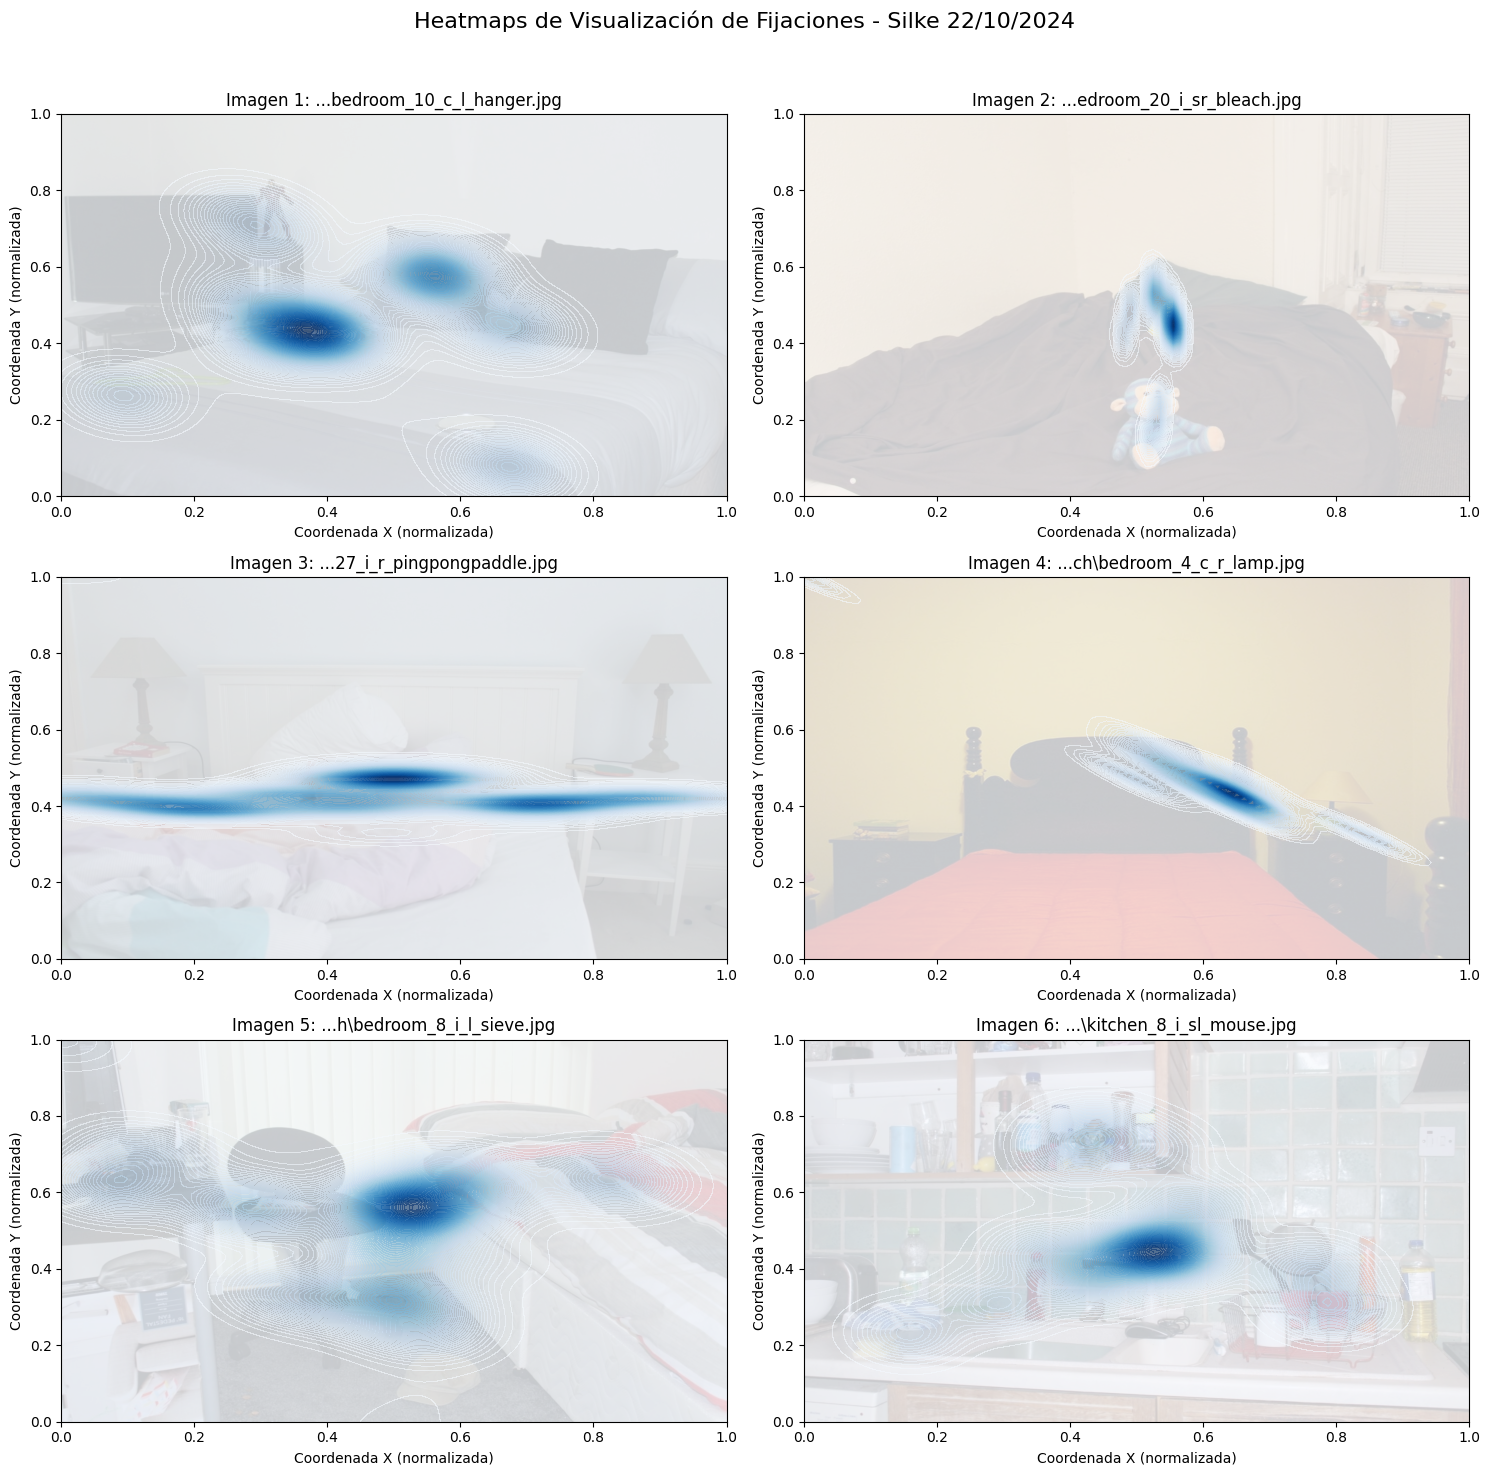

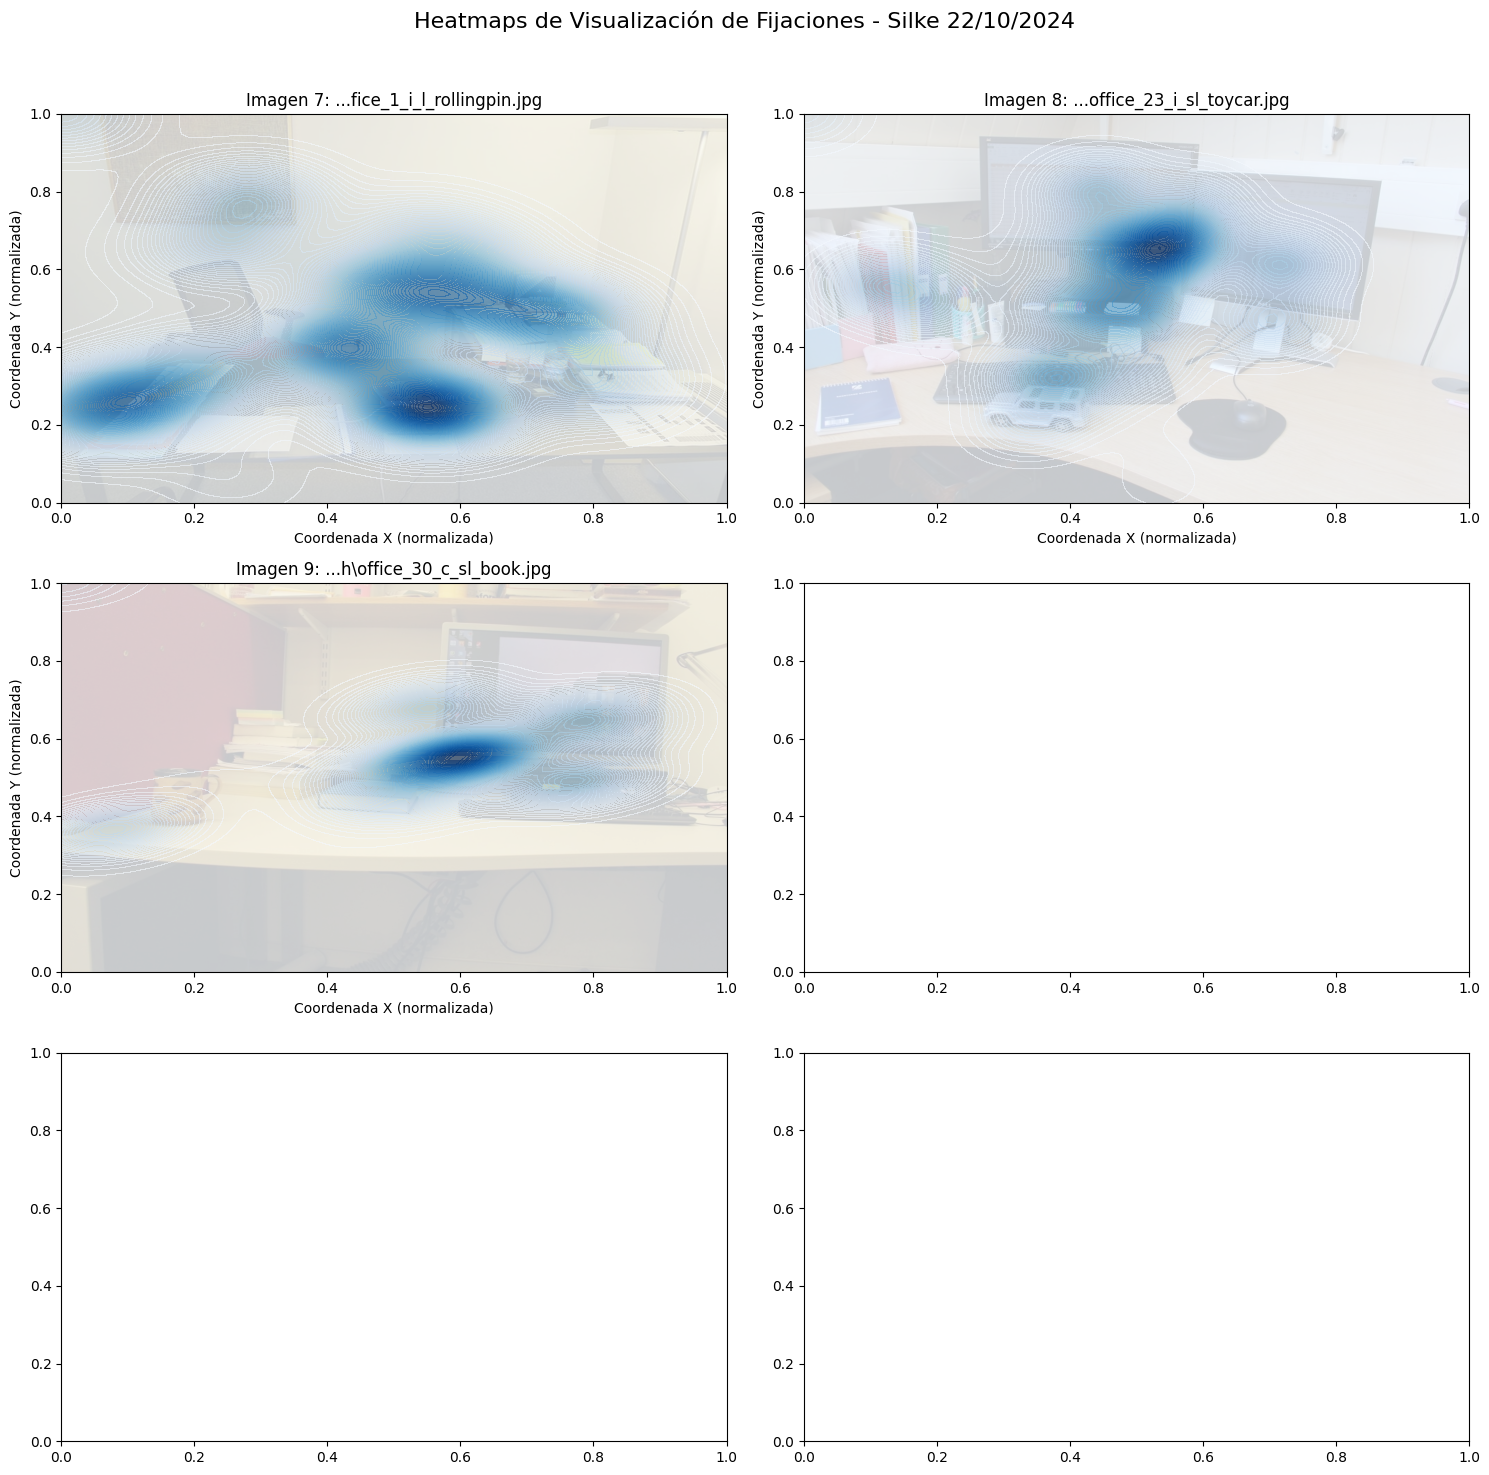

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.image as mpimg

# Lista de imágenes únicas
imagenes = df_merged['path'].unique()

# Definir el número de filas y columnas para el mosaico
rows, cols = 3, 2

# Inicializar el contador de gráficos
fig_counter = 0
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Ajusta el tamaño de la figura para el mosaico

# Título general para las figuras
titulo_general = "Heatmaps de Visualización de Fijaciones - Silke 22/10/2024"

for idx, img in enumerate(imagenes):
    # Filtrar el DataFrame por la imagen actual
    df_img = df_merged[df_merged['path'] == img]

    # Crear la cuadrícula para el KDE
    x = df_img['FPOGX']
    y = df_img['FPOGY']
    
    # Crear una malla para la densidad
    xi = np.linspace(0, 1, 100)
    yi = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(xi, yi)

    # Calcular la densidad utilizando gaussian_kde
    xy = np.vstack([x, y])
    Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Invertir el eje Y de los datos del heatmap
    Z = np.flipud(Z)  # Invierte los valores del heatmap a lo largo del eje Y

    # Determinar la posición del gráfico en el mosaico
    row = fig_counter // cols
    col = fig_counter % cols

    # Cargar y mostrar la imagen como fondo en la posición adecuada
    img_data = mpimg.imread(img)
    axes[row, col].imshow(img_data, extent=[0, 1, 0, 1], aspect='auto', alpha=0.5)

    # Crear el gráfico de densidad
    contour = axes[row, col].contourf(X, Y, Z, levels=100, cmap="Blues", alpha=0.6)

    # Configuración del gráfico individual
    axes[row, col].set_title(f'Imagen {idx+1}: ...{img[-25:]}')
    axes[row, col].set_xlabel('Coordenada X (normalizada)')
    axes[row, col].set_ylabel('Coordenada Y (normalizada)')
    axes[row, col].set_xlim(0, 1)
    axes[row, col].set_ylim(0, 1)

    # Incrementar el contador de gráficos
    fig_counter += 1

    # Cada 6 imágenes (3 filas x 2 columnas), mostrar y reiniciar la figura
    if fig_counter == rows * cols or idx == len(imagenes) - 1:
        # Ajustar el layout para que no se solapen los gráficos
        fig.suptitle(titulo_general, fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el espacio para el título
        plt.show()

        # Reiniciar la figura y el contador de gráficos si quedan más imágenes
        if idx < len(imagenes) - 1:
            fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
            fig_counter = 0


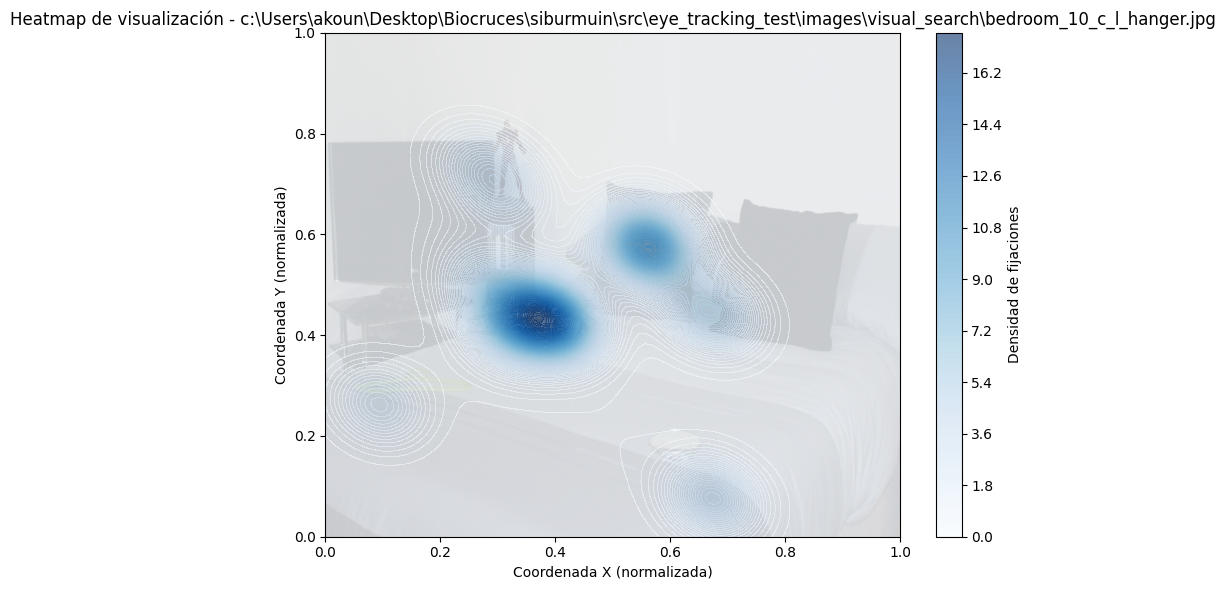

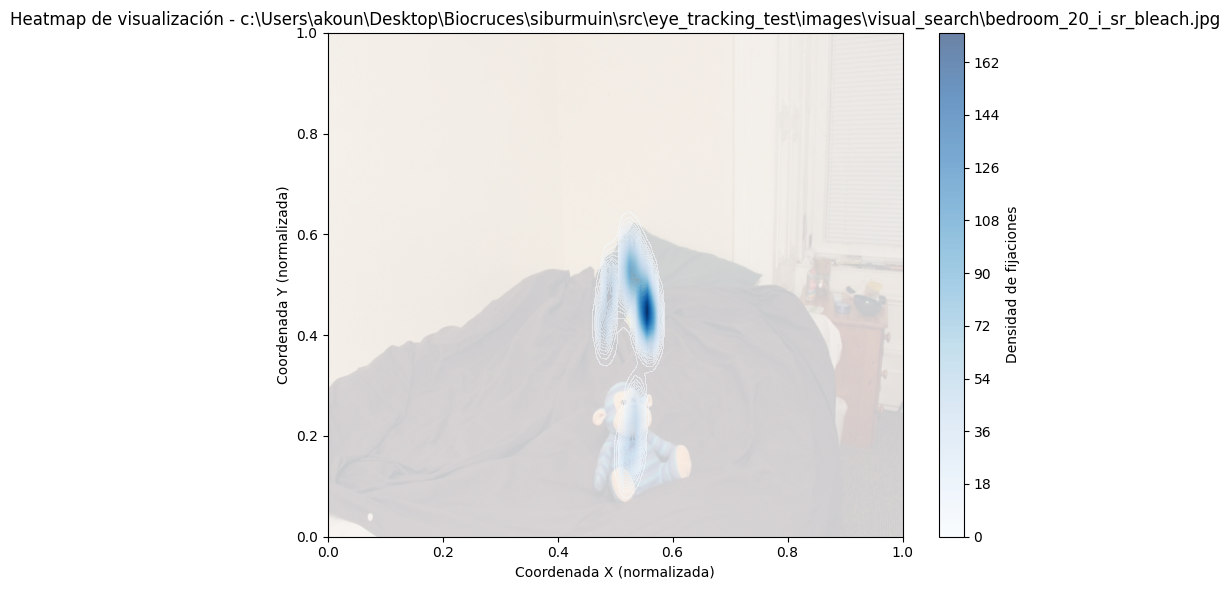

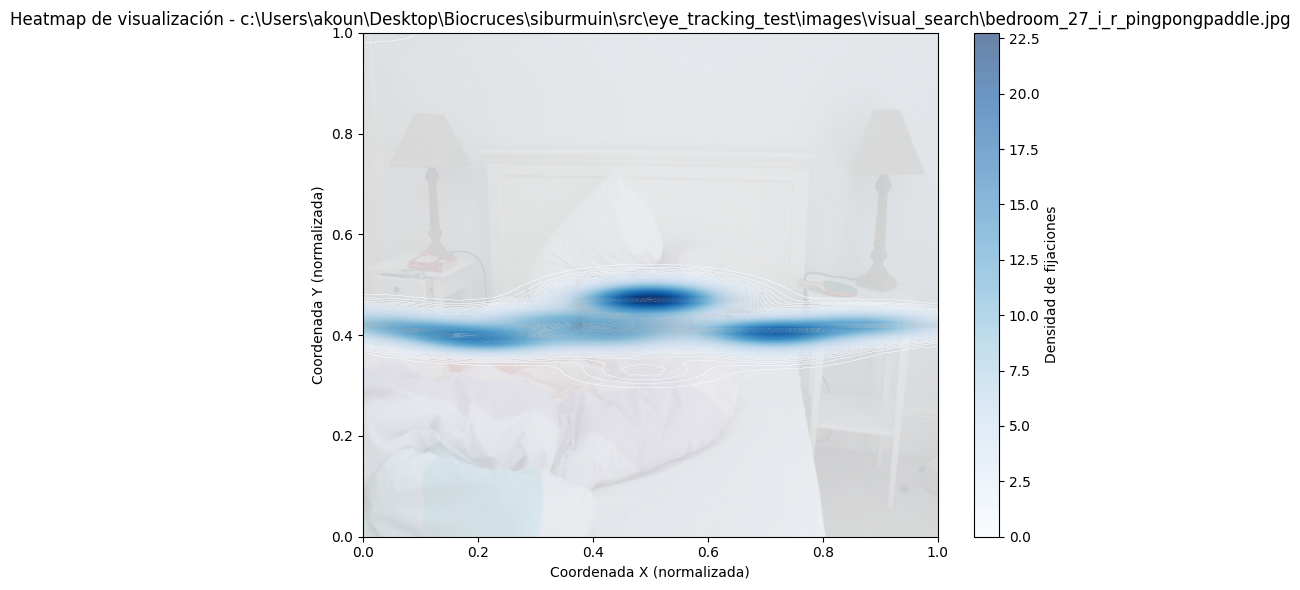

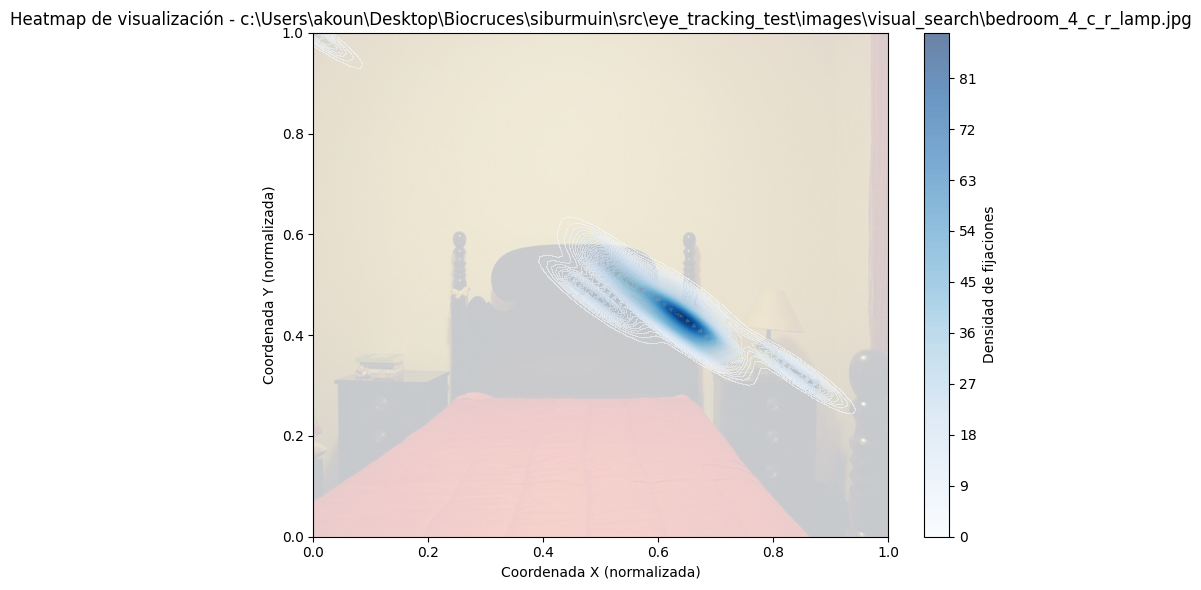

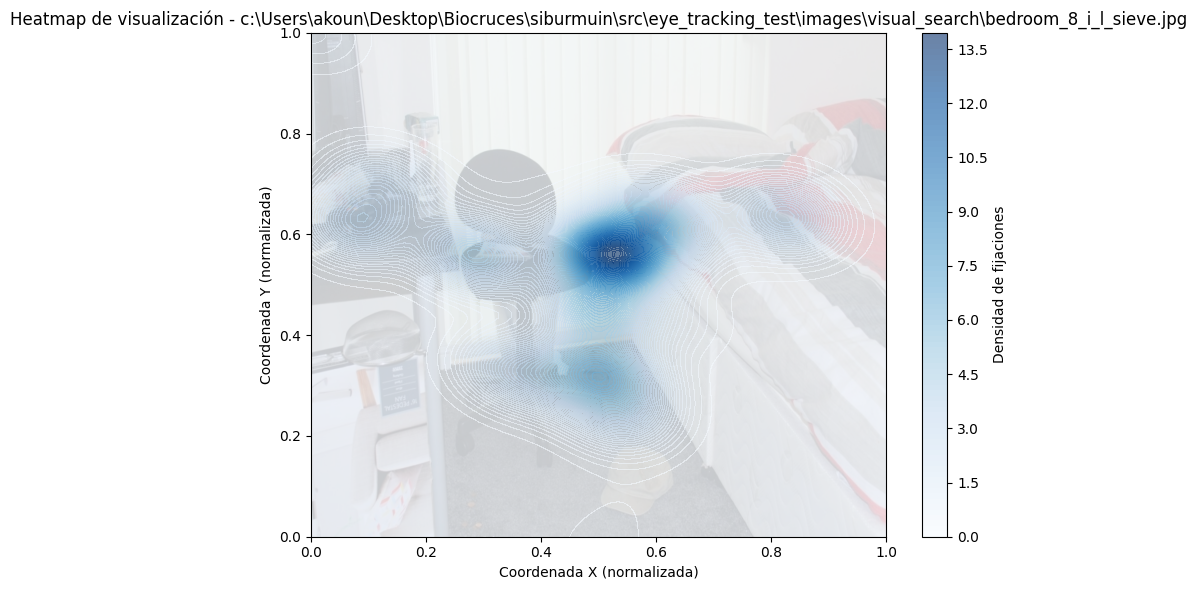

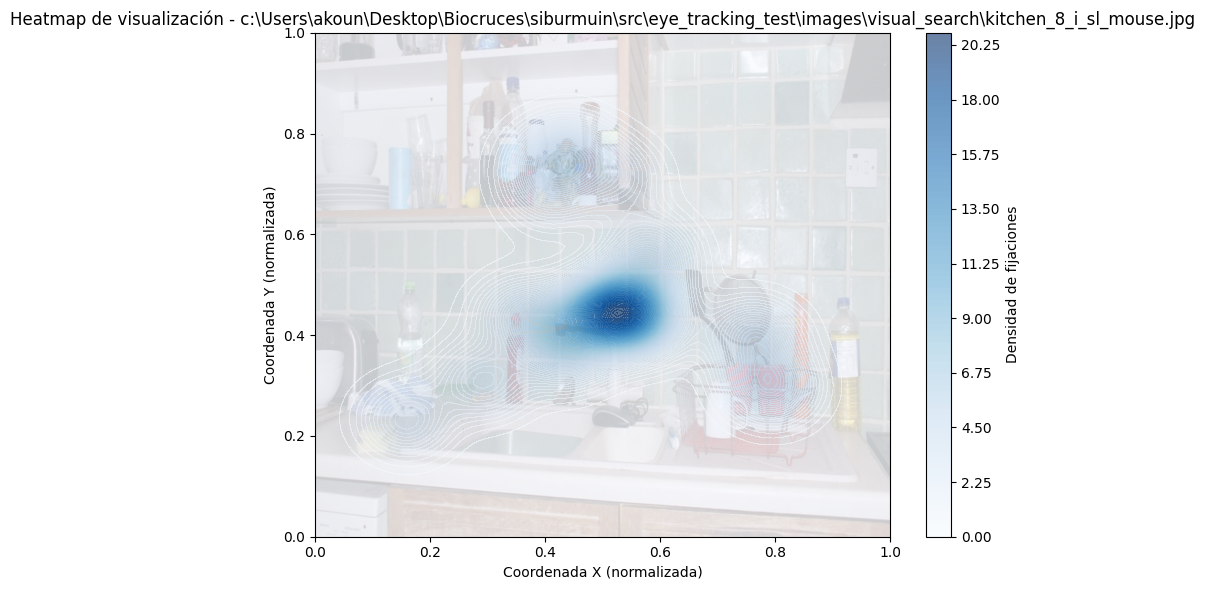

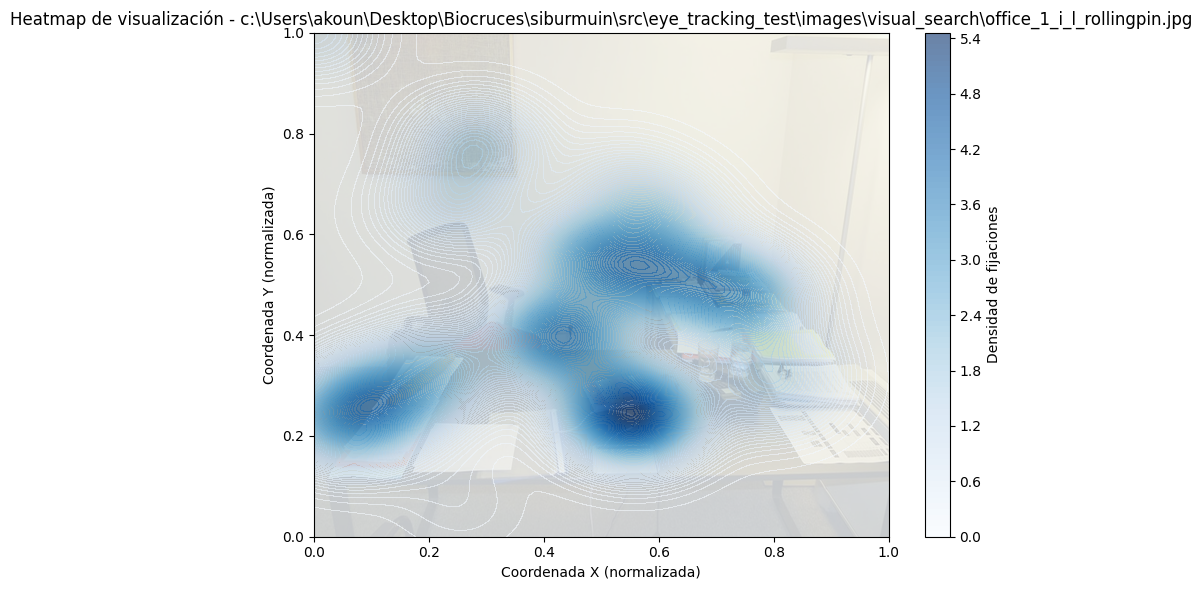

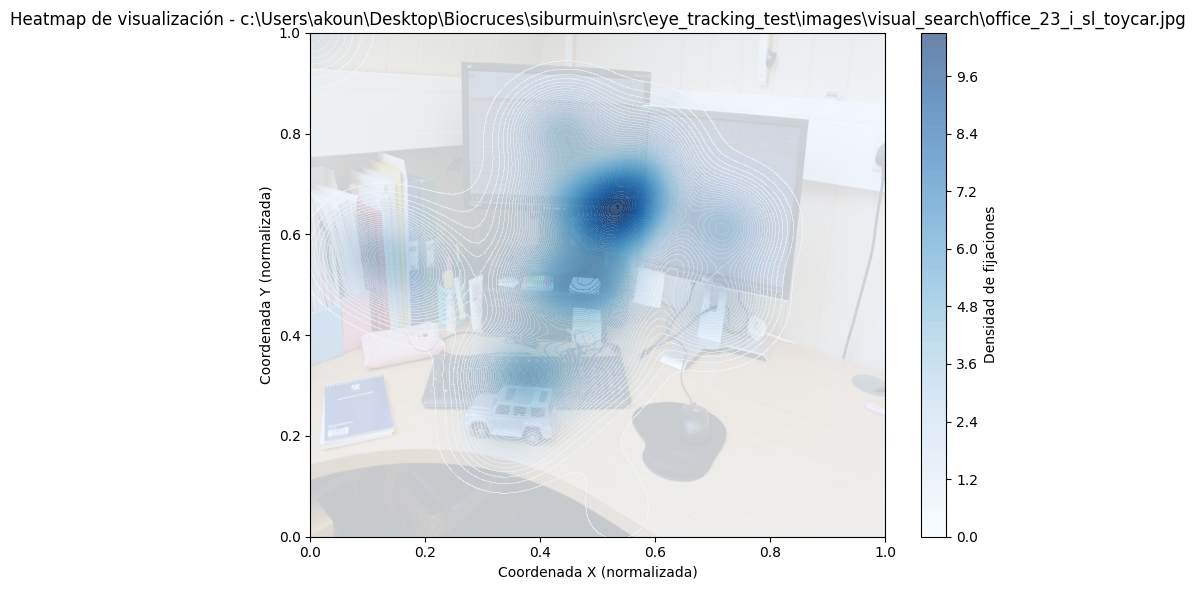

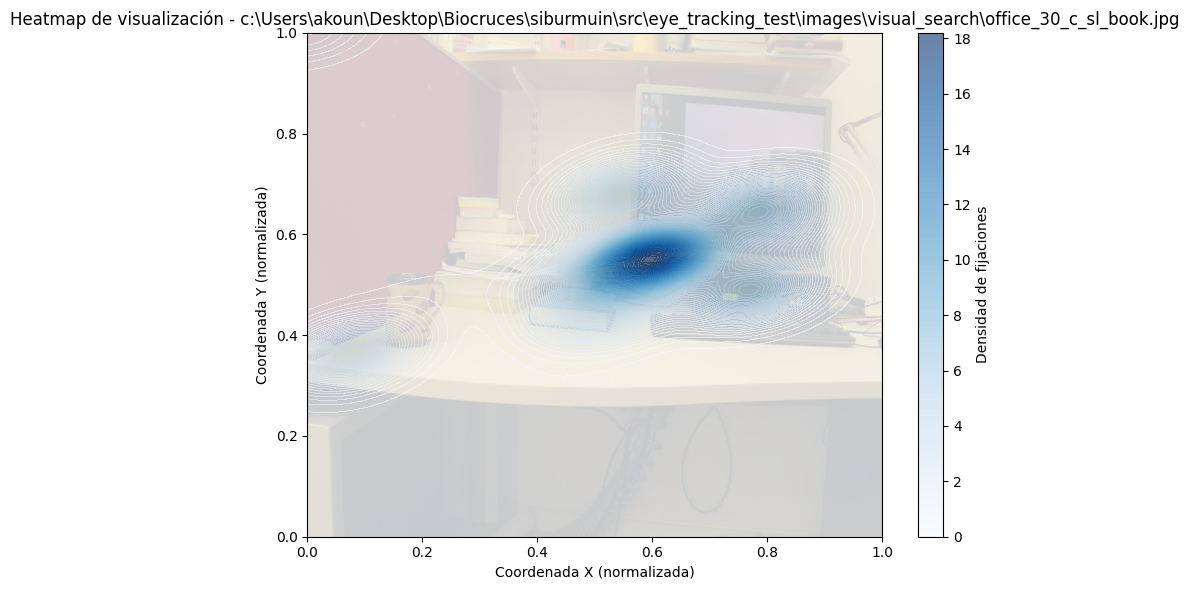

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.image as mpimg

# Lista de imágenes únicas
imagenes = df_merged['path'].unique()

# Generar un heatmap para cada imagen
for img in imagenes:
    # Filtrar el DataFrame por la imagen actual
    df_img = df_merged[df_merged['path'] == img]

    # Crear la cuadrícula para el KDE
    x = df_img['FPOGX']
    y = df_img['FPOGY']
    
    # Crear una malla para la densidad
    xi = np.linspace(0, 1, 100)
    yi = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(xi, yi)

    # Calcular la densidad utilizando gaussian_kde
    xy = np.vstack([x, y])
    Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Invertir el eje Y de los datos del heatmap
    Z = np.flipud(Z)  # Invierte los valores del heatmap a lo largo del eje Y

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(8, 6))

    # Cargar y mostrar la imagen como fondo
    img_data = mpimg.imread(img)
    ax.imshow(img_data, extent=[0, 1, 0, 1], aspect='auto', alpha=0.5)  # Ajustar alpha para transparencia

    # Crear el gráfico de densidad
    contour = ax.contourf(X, Y, Z, levels=100, cmap="Blues", alpha=0.6)  # También ajustar alpha

    # Configuración del gráfico
    ax.set_title(f'Heatmap de visualización - {img}')
    ax.set_xlabel('Coordenada X (normalizada)')
    ax.set_ylabel('Coordenada Y (normalizada)')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.colorbar(contour, ax=ax, label='Densidad de fijaciones')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()


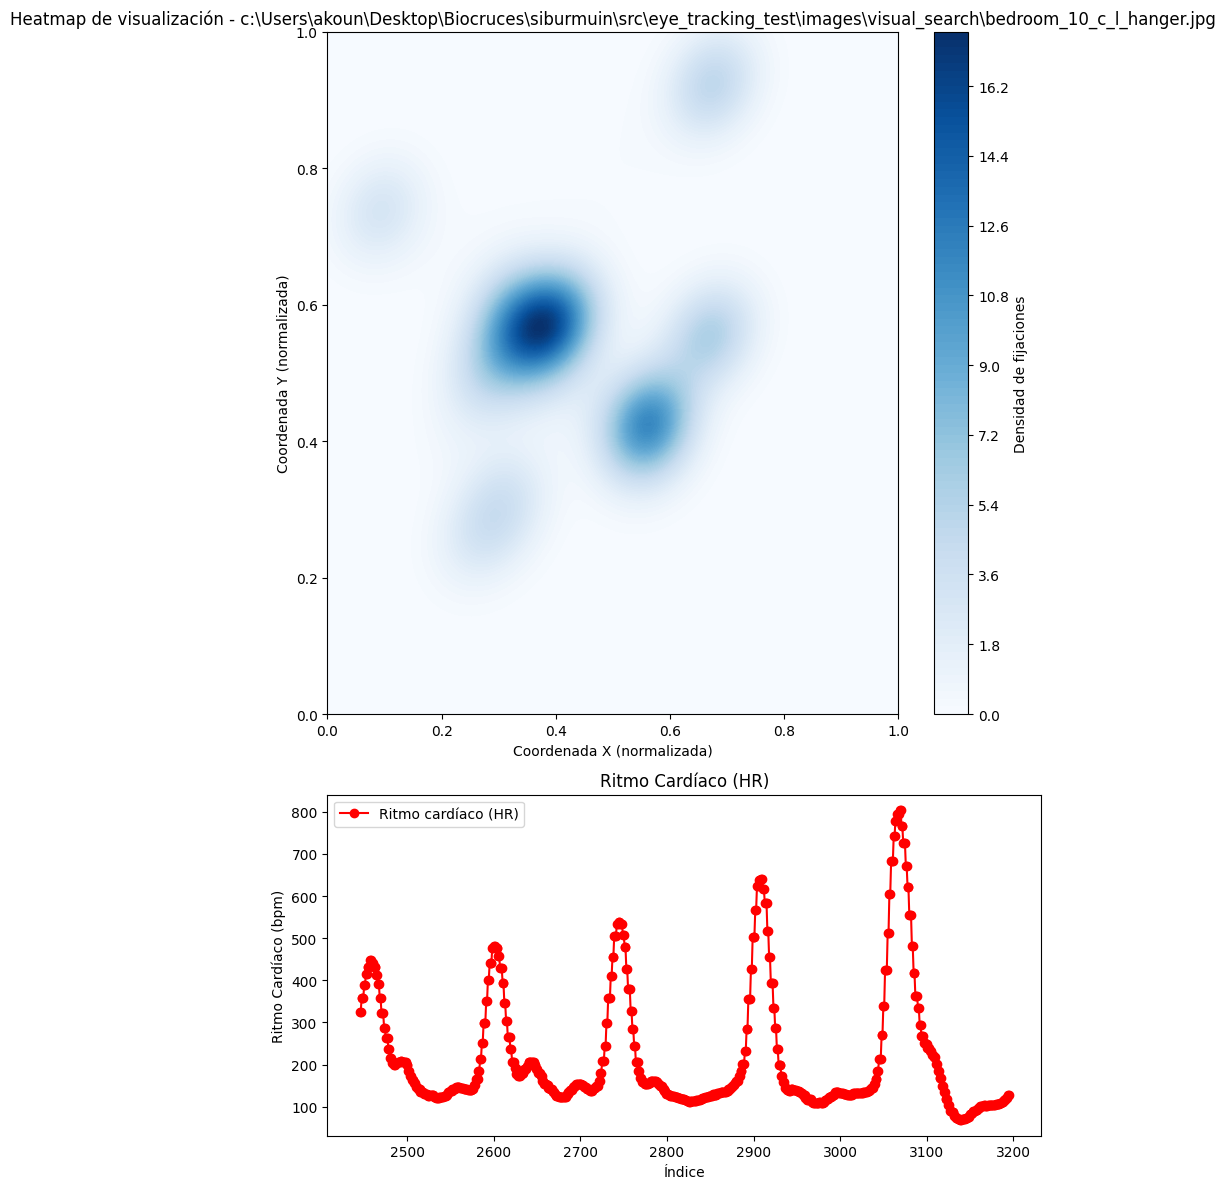

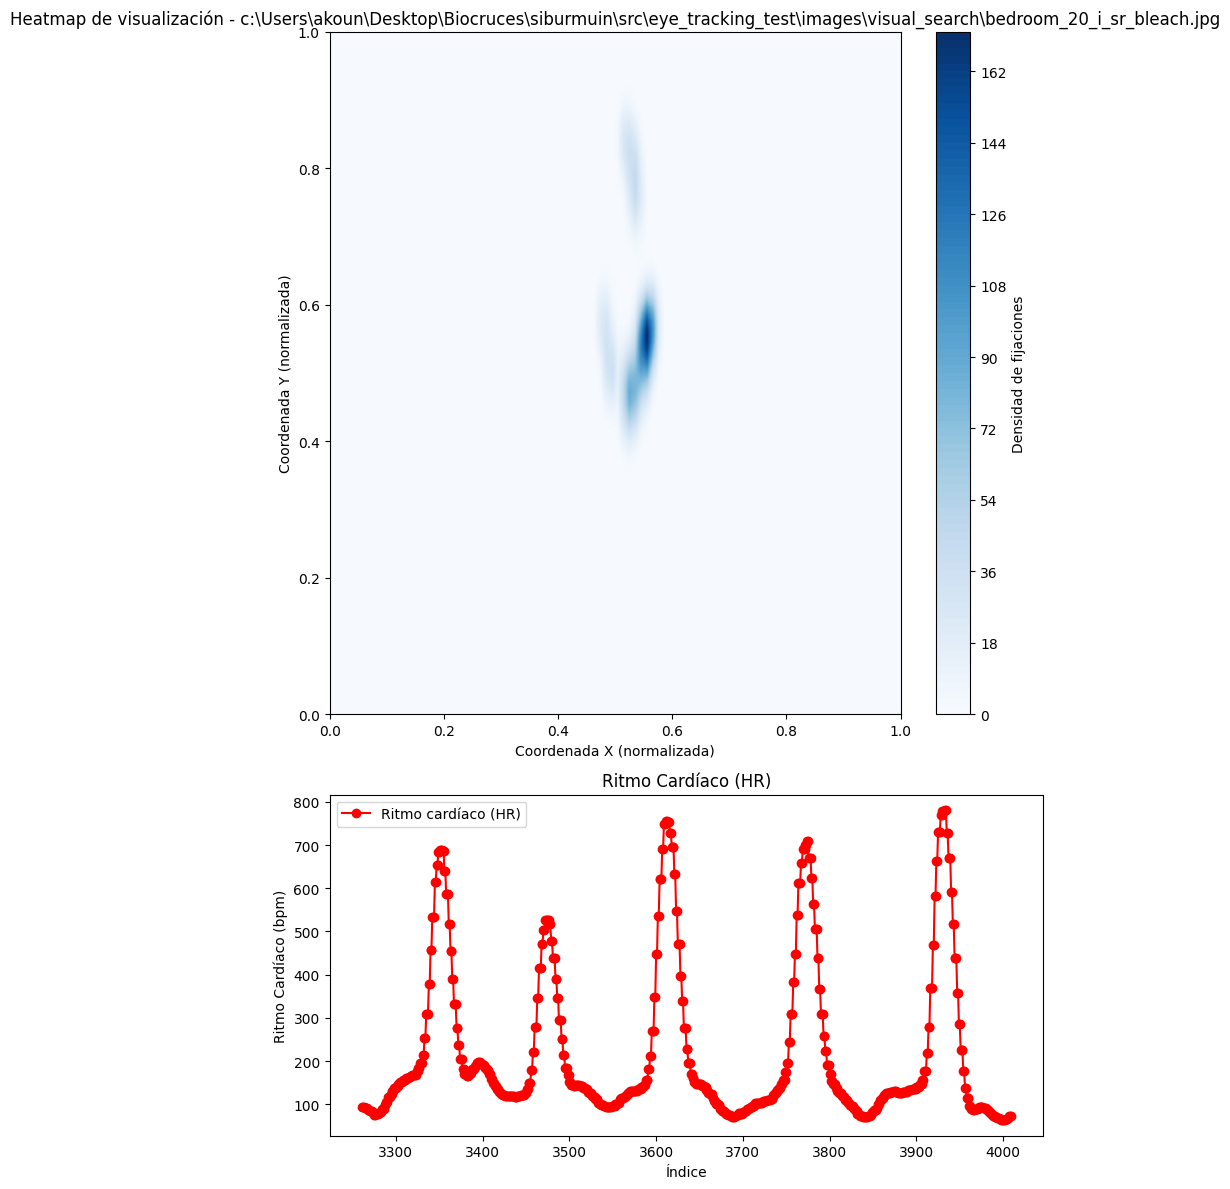

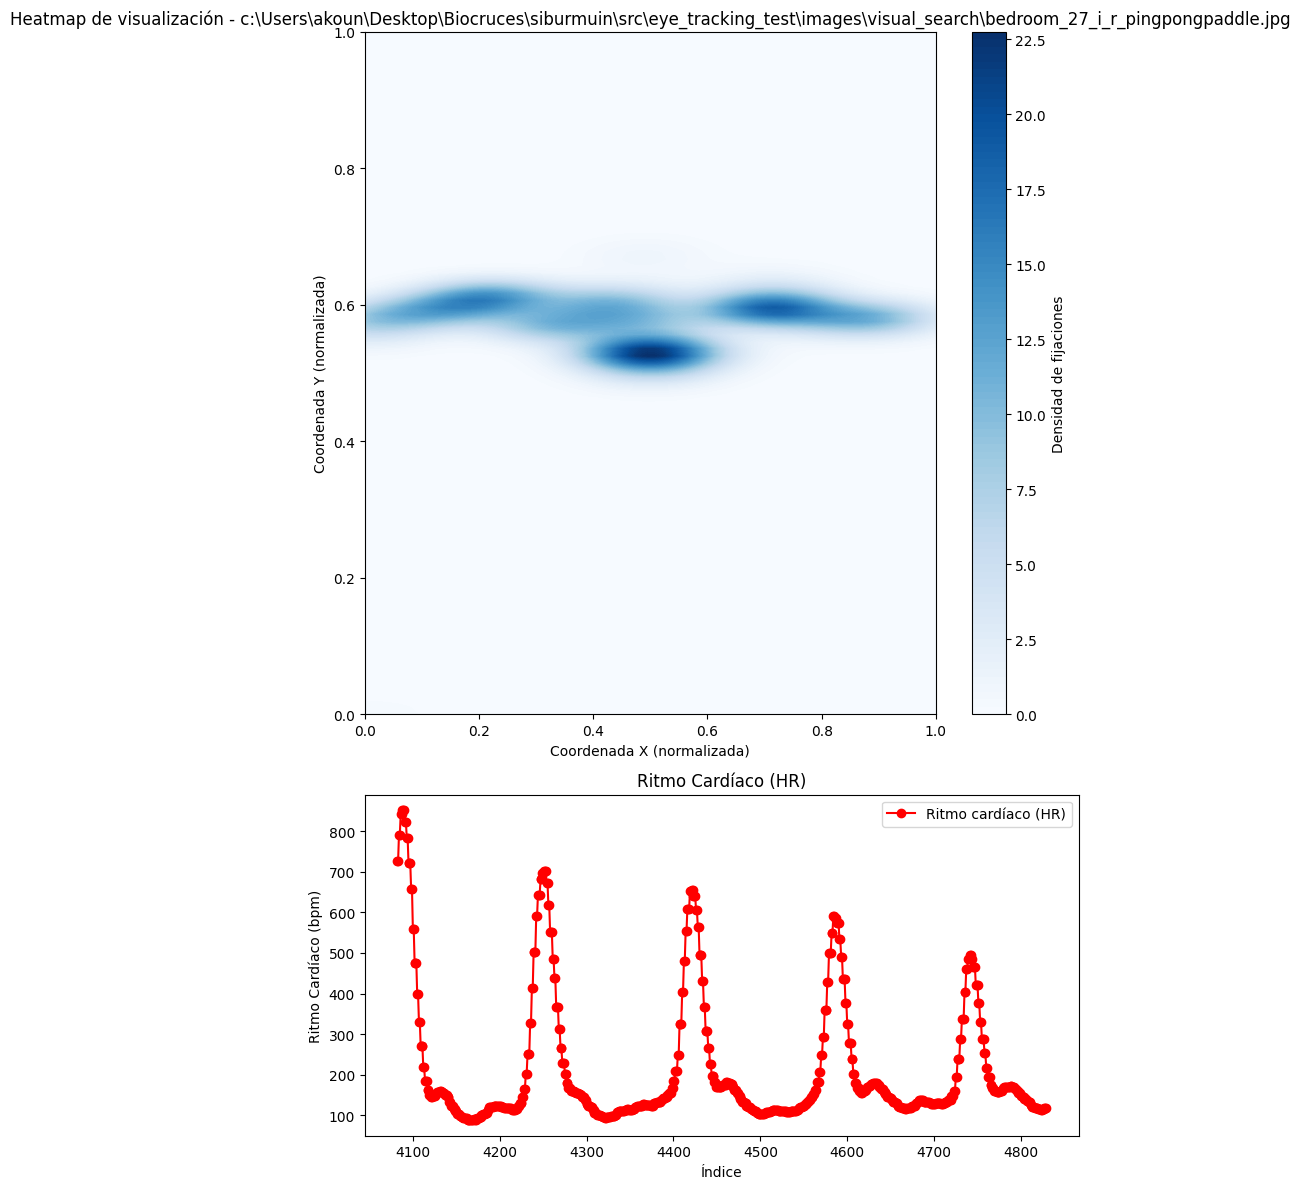

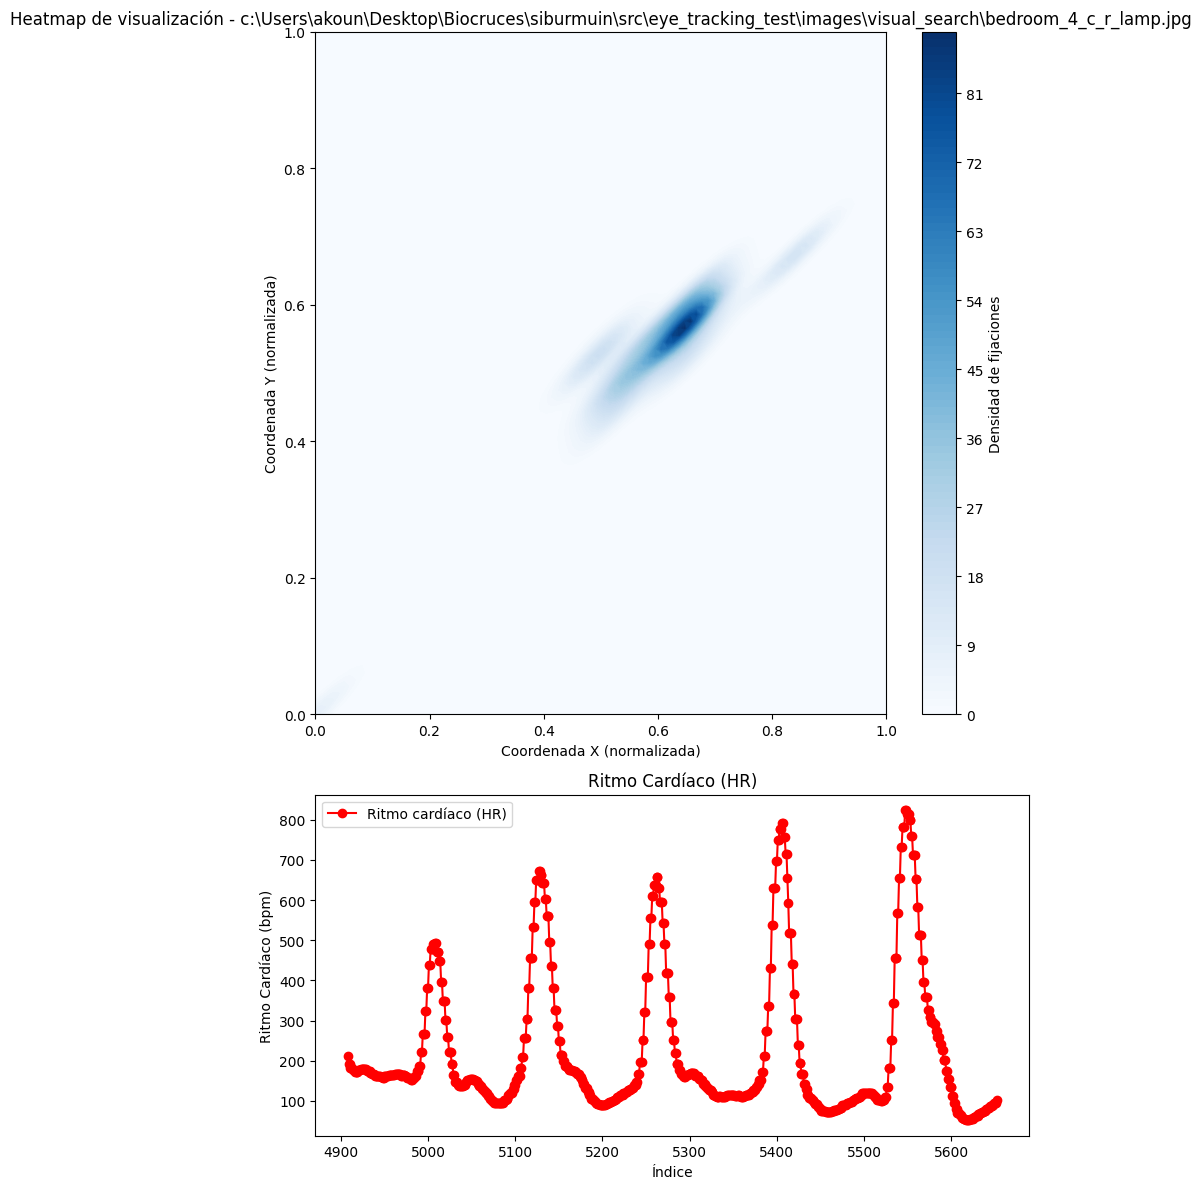

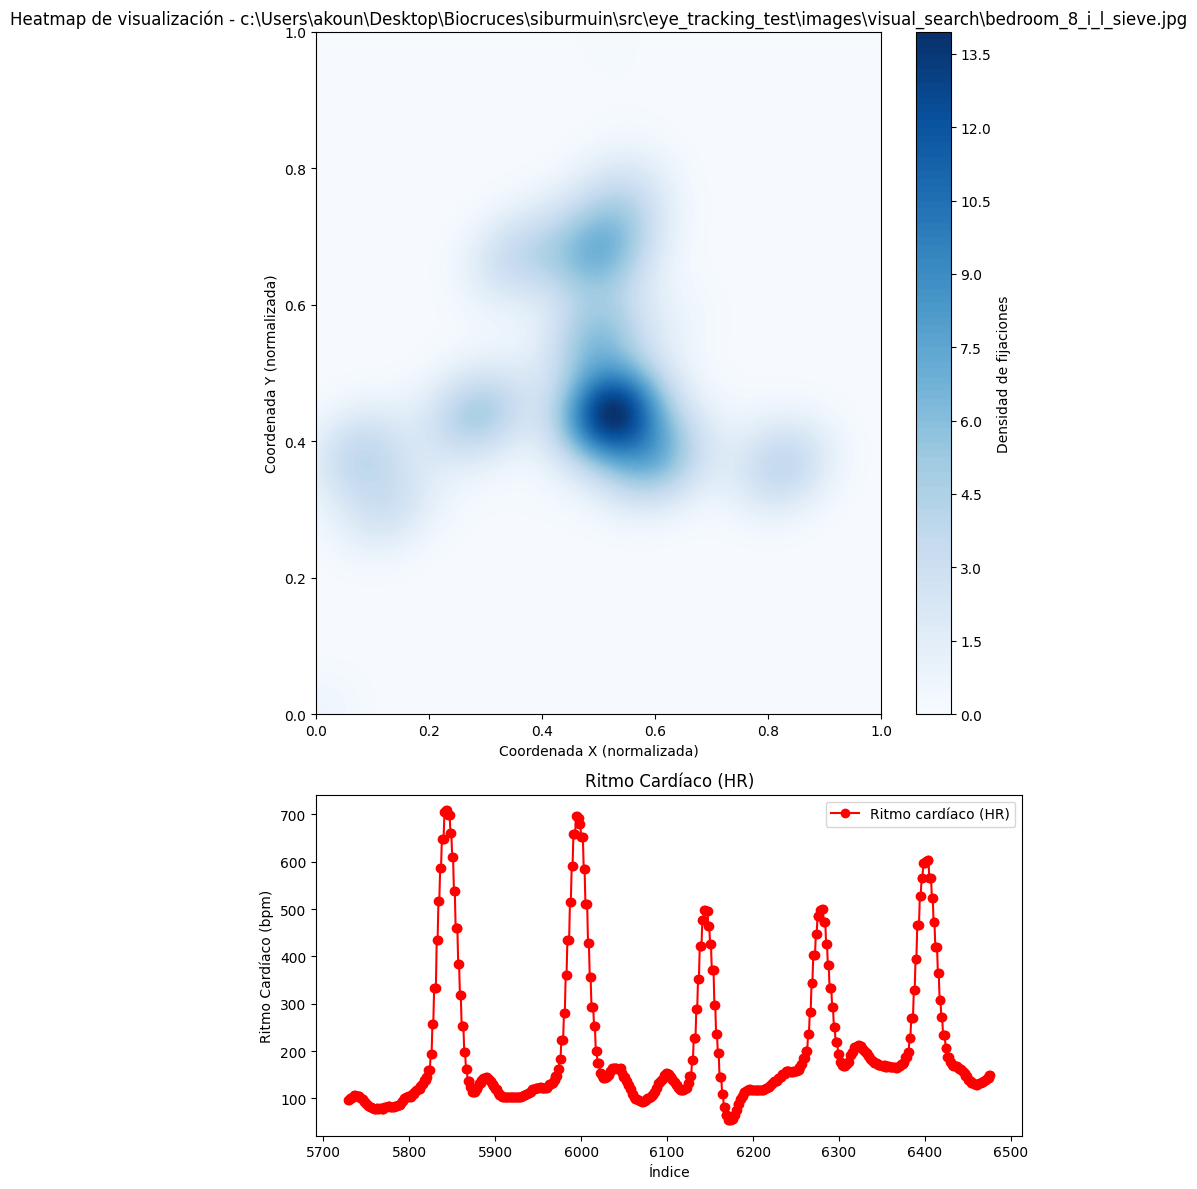

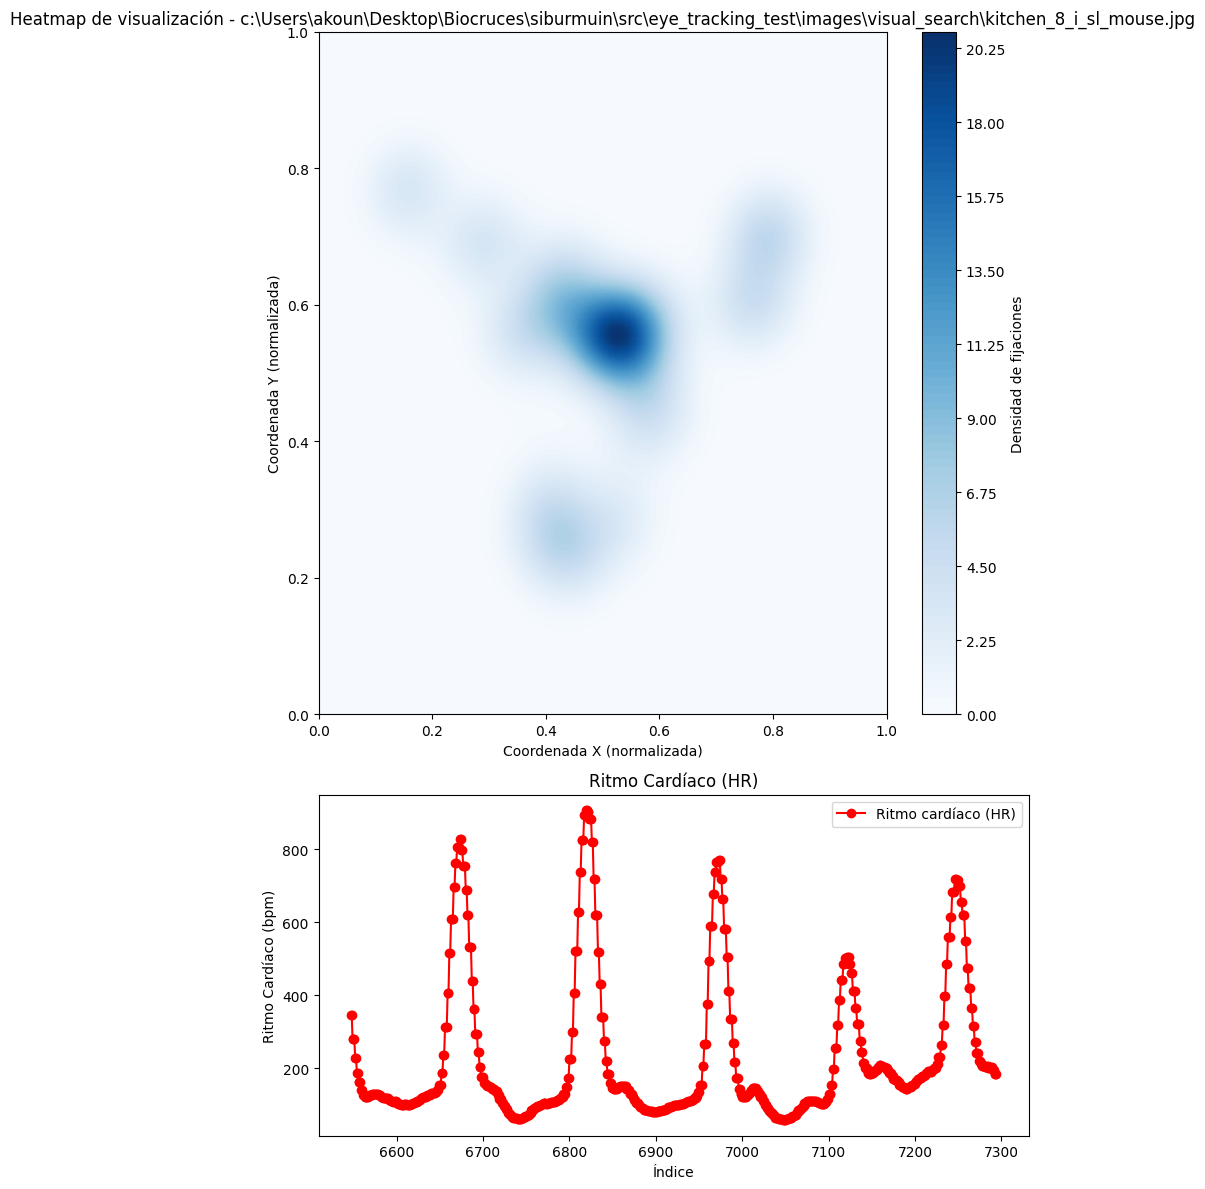

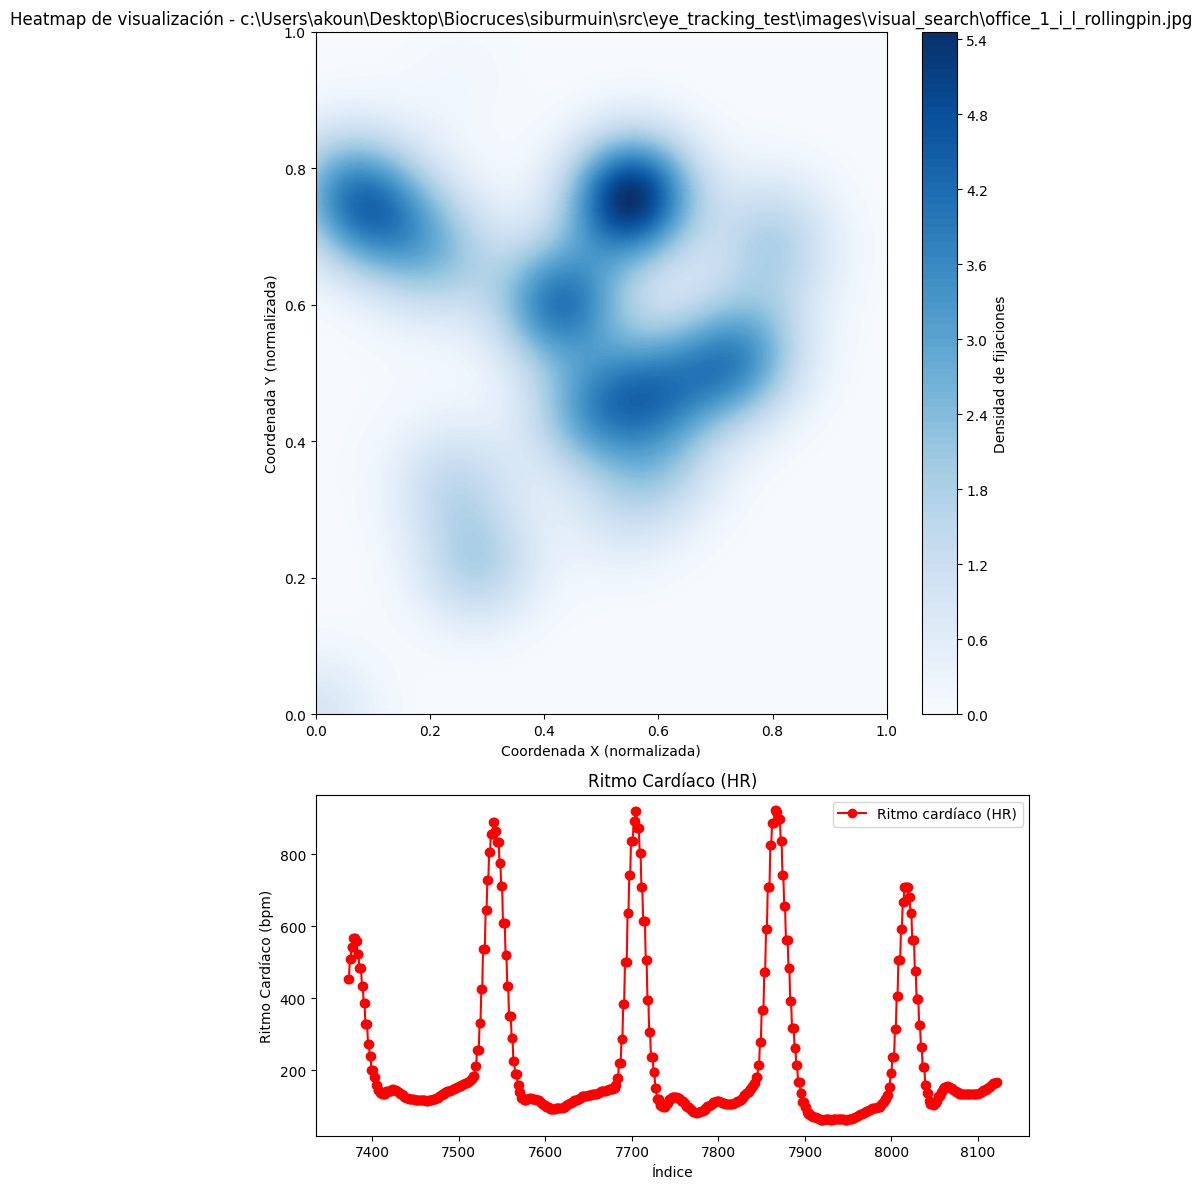

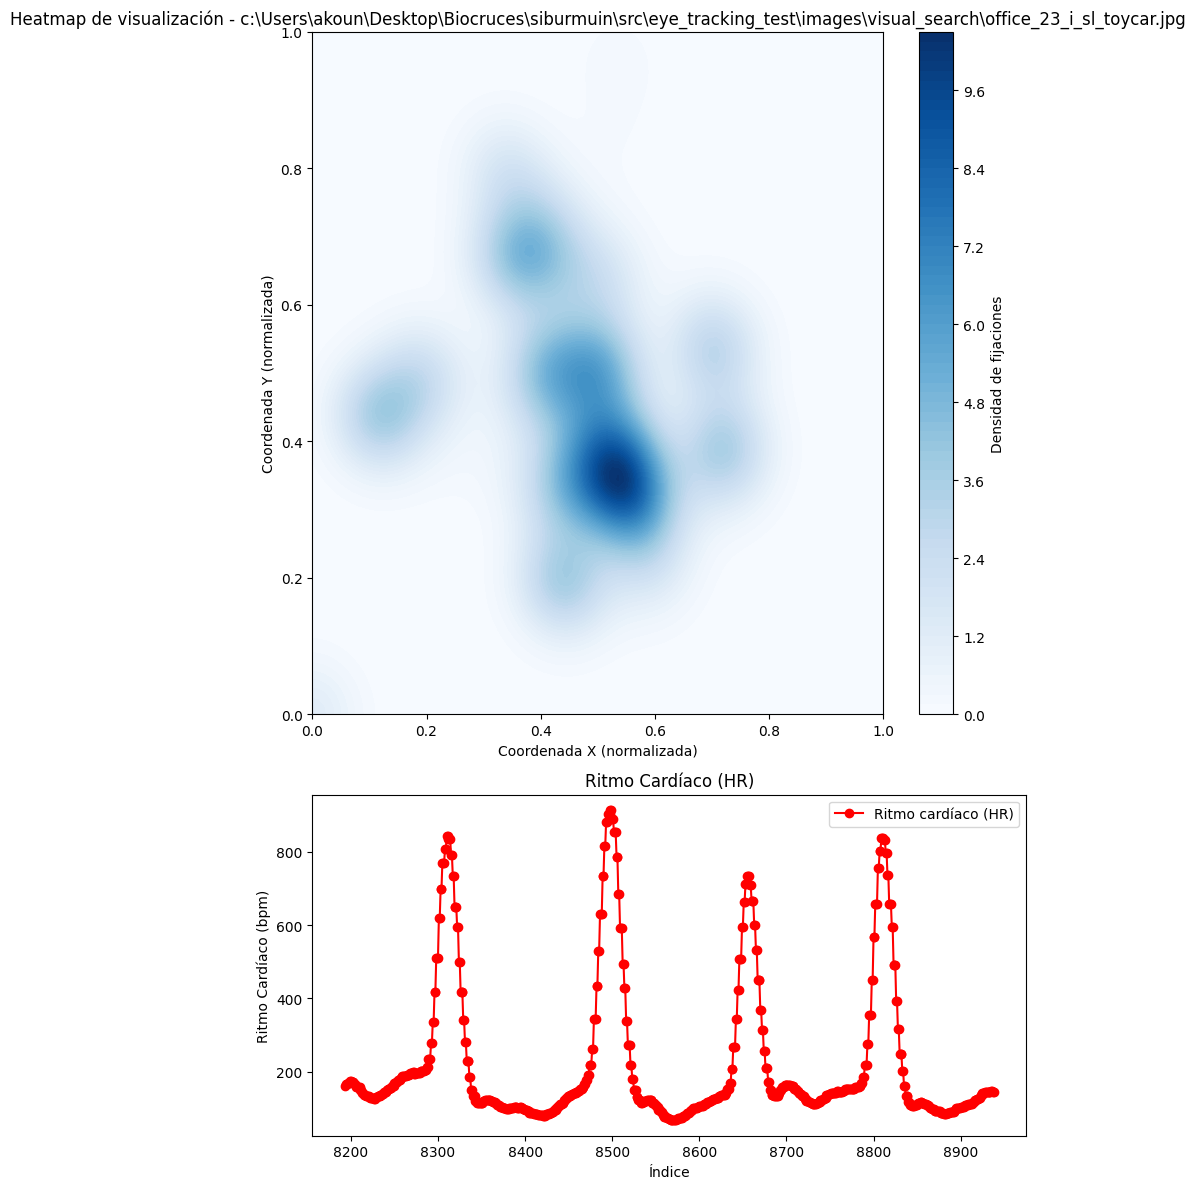

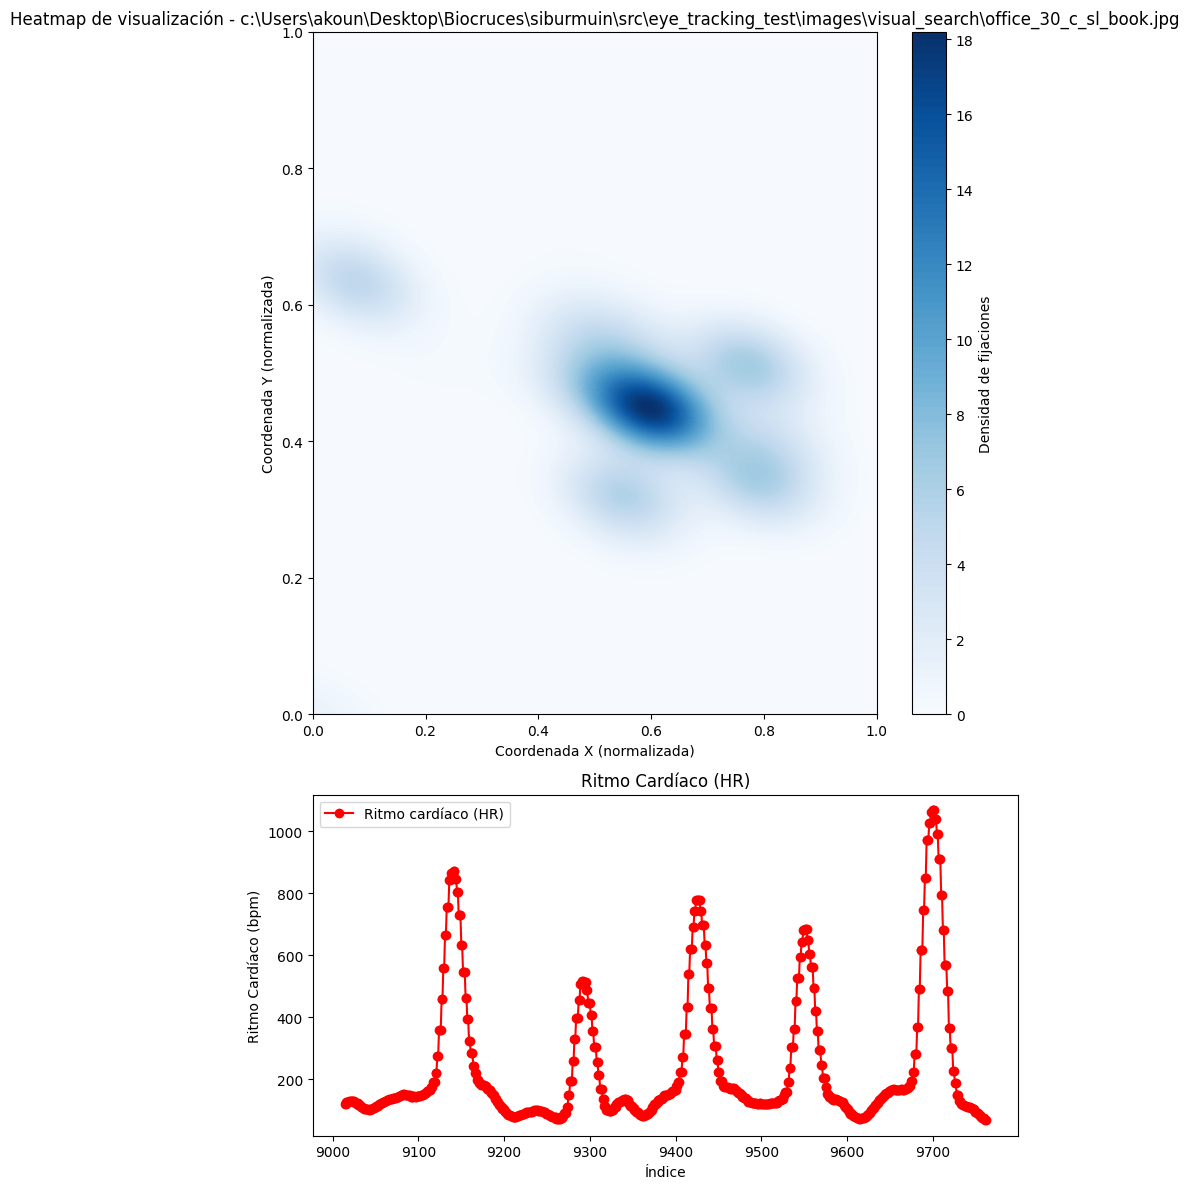

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Supongamos que ya tienes tu DataFrame df_media y df_merged
# df_media = pd.DataFrame({
#     'FPOGX': [0.1, 0.2, 0.3, 0.4, 0.1, 0.2, 0.6],
#     'FPOGY': [0.1, 0.4, 0.2, 0.5, 0.1, 0.8, 0.6],
#     'path': ['img1', 'img1', 'img1', 'img1', 'img2', 'img2', 'img2'],
#     'HRP': [70, 72, 68, 75, 73, 70, 69]  # Ejemplo de datos de ritmo cardíaco
# })

# Lista de imágenes únicas
imagenes = df_merged['path'].unique()

# Generar un heatmap para cada imagen
for img in imagenes:
    # Filtrar el DataFrame por la imagen actual
    df_img = df_merged[df_merged['path'] == img]

    # Crear la cuadrícula para el KDE
    x = df_img['FPOGX']
    y = df_img['FPOGY']
    
    # Crear una malla para la densidad
    xi = np.linspace(0, 1, 100)
    yi = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(xi, yi)

    # Calcular la densidad utilizando gaussian_kde
    xy = np.vstack([x, y])
    Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Crear el gráfico
    fig, ax = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [2, 1]})

    # Primer subplot: Heatmap
    contour = ax[0].contourf(X, Y, Z, levels=100, cmap="Blues")
    ax[0].set_title(f'Heatmap de visualización - {img}')
    ax[0].set_xlabel('Coordenada X (normalizada)')
    ax[0].set_ylabel('Coordenada Y (normalizada)')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    fig.colorbar(contour, ax=ax[0], label='Densidad de fijaciones')

    # Segundo subplot: Ritmo cardíaco
    ax[1].plot(df_img.index, df_img['HRP'], marker='o', color='red', label='Ritmo cardíaco (HR)')
    ax[1].set_title('Ritmo Cardíaco (HR)')
    ax[1].set_xlabel('Índice')
    ax[1].set_ylabel('Ritmo Cardíaco (bpm)')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()
